# Introduction

I am going to handle the missing data of the data set which I scraped from kolesa.kz earlier with NaN values replaced with mean and mode.
After that, I will make a feature selection and exploration with preprocessing for my dataset.

Importing libraries:

In [1]:
import numpy as np # used for handling numbers
import pandas as pd

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import MinMaxScaler

from jupyterthemes import jtplot
jtplot.style('oceans16')

Importing the dataset:

In [2]:
df = pd.read_excel('car_sells.xlsx')
df.shape

(372, 14)

### Operations for cleaning and shaping the data frame:

In [3]:
df[['Объем двигателя, л', 'Топливо']] = df['Объем двигателя, л'].str.split(' ', expand=True)
df['Объем двигателя, л'] = df['Объем двигателя, л'].astype('float')

df['Топливо'] = df['Топливо'].str.replace('(', '')
df['Топливо'] = df['Топливо'].str.replace(')', '')

df['Пробег'] = df['Пробег'].str.replace(' км', '')
df['Пробег'] = df['Пробег'].str.replace(' ', '')
df['Пробег'] = df['Пробег'].astype('float')

df.replace('NaN', 'null')
df.replace('null', np.nan)

df

,Brand,Name,Year,Price,Currency,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Топливо
0,ВАЗ (Lada),Largus,2013,3100000,₸,Шымкент,универсал,1.6,NaN,механика,слева,белый,передний привод,Да,газ-бензин
1,Daewoo,Nexia,2012,2100000,₸,Шымкент,седан,1.6,141000.0,механика,слева,серебристый металлик,передний привод,Да,бензин
2,Mitsubishi,Outlander,2013,6500000,₸,Шымкент,кроссовер,2.4,100375.0,автомат,слева,черный металлик,полный привод,Да,бензин
3,УАЗ,Hunter,2017,4500000,₸,Шымкент,внедорожник,2.7,55000.0,механика,слева,NaN,полный привод,Да,бензин
4,ВАЗ (Lada),2190 (седан),2018,3650000,₸,Шымкент,седан,1.6,23500.0,механика,слева,серебристый металлик,передний привод,Да,бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Toyota,Camry,2017,13000000,₸,Шымкент,седан,2.5,139000.0,автомат,слева,белый металлик,передний привод,Да,бензин
368,Ravon,R4,2017,4250000,₸,Шымкент,седан,1.5,49500.0,механика,слева,белый металлик,передний привод,Да,бензин
369,Hyundai,Solaris,2011,2900000,₸,Шымкент,седан,1.4,170000.0,автомат,слева,серый металлик,передний привод,Нет,бензин
370,Renault,Kaptur,2020,9796000,₸,Шымкент,кроссовер,1.6,NaN,механика,слева,NaN,передний привод,Да,бензин


### Looking for missing values and dealing with them

In [4]:
mask = df.isna().sum() / len(df) < 0.3
print(mask)

Brand                      True
Name                       True
Year                       True
Price                      True
Currency                   True
Город                      True
Кузов                      True
Объем двигателя, л         True
Пробег                     True
Коробка передач            True
Руль                       True
Цвет                       True
Привод                     True
Растаможен в Казахстане    True
Топливо                    True
dtype: bool


Looking at the dataset, checking datatypes, null values and etc...

In [5]:
df.isnull().sum()

Brand                       0
Name                        0
Year                        0
Price                       0
Currency                    0
Город                       0
Кузов                       0
Объем двигателя, л          0
Пробег                     72
Коробка передач             0
Руль                        0
Цвет                       40
Привод                     54
Растаможен в Казахстане     0
Топливо                     0
dtype: int64

<AxesSubplot:>

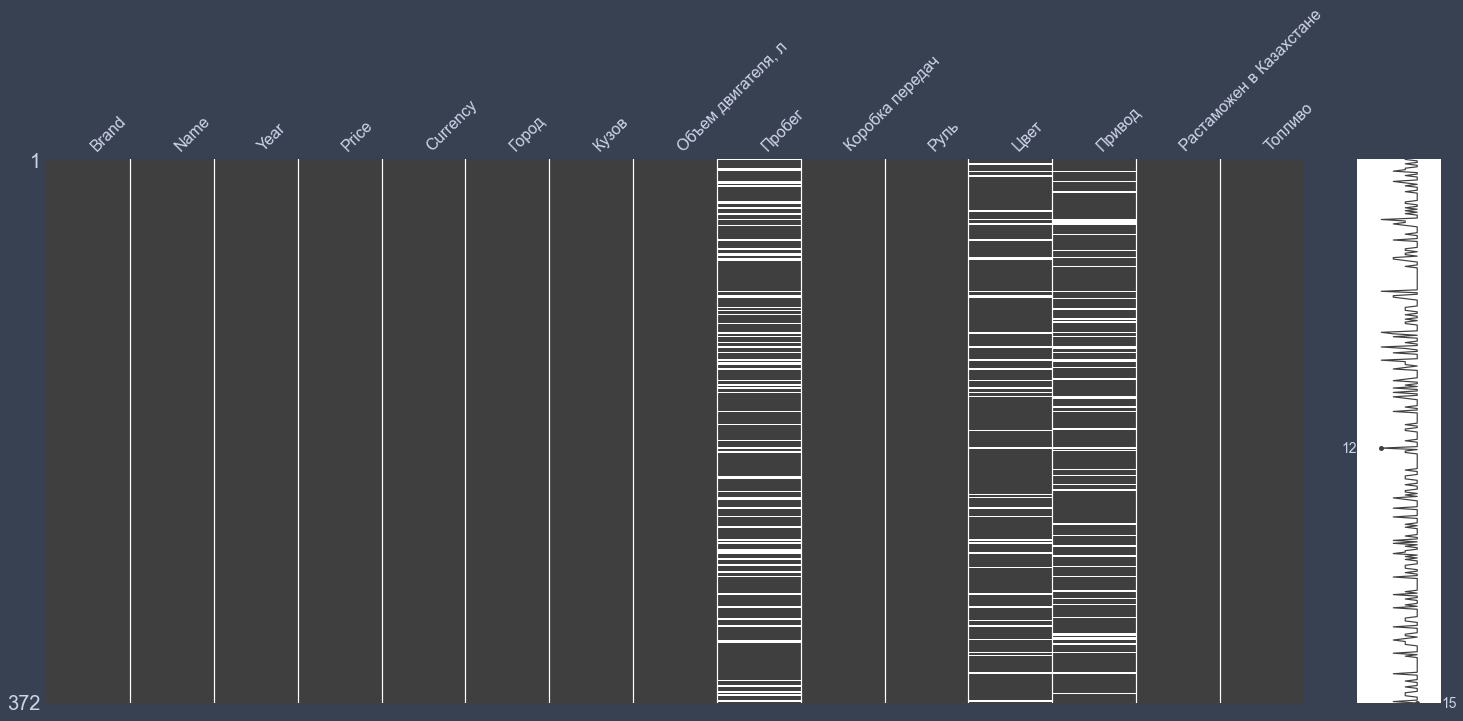

In [6]:
import missingno as msno

msno.matrix(df)

### Imputing values by using SI at strategy mean for "Пробег" colunm and with strategy mode for "Привод" and "Цвет":

In [7]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_copy = df.copy()

df_copy['Пробег'] = mean_imputer.fit_transform(df_copy[['Пробег']]).ravel()
print(df_copy['Пробег'].isnull().sum())

df_copy['Привод'] = mode_imputer.fit_transform(df_copy[['Привод']]).ravel()
print(df_copy['Привод'].isnull().sum())

df_copy['Цвет'] = mode_imputer.fit_transform(df_copy[['Цвет']]).ravel()
print(df_copy['Цвет'].isnull().sum())

0
0
0


### Copying dataframe as a reserve

In [8]:
df_org  = df.copy()
dfm = df_copy.copy()

### Now I am going to take dummies of categorical data after filling missing values:

In [9]:
#import category_encoders as ce 

#col = ['Brand', 'Name', 'Кузов', 'Коробка передач', 'Руль', 'Привод', 'Растаможен в Казахстане', 'Цвет', 'Топливо']

#enc = ce.OneHotEncoder(cols=col, handle_unknown='return_nan', return_df=True, use_cat_names=True)

#df_enc = enc.fit_transform(dfm)
df = dfm.drop('Currency', axis=1)
df = df.drop('Город', axis=1)
df = df.drop('Цвет', axis=1)
df = df.drop('Name', axis=1)
df = pd.get_dummies(df)
df

,Year,Price,"Объем двигателя, л",Пробег,Brand_Audi,Brand_BMW,Brand_Chery,Brand_Chevrolet,Brand_Daewoo,Brand_FAW,...,Руль_справа,Привод_задний привод,Привод_передний привод,Привод_полный привод,Растаможен в Казахстане_Да,Растаможен в Казахстане_Нет,Топливо_бензин,Топливо_газ,Топливо_газ-бензин,Топливо_дизель
0,2013,3100000,1.6,86805.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2012,2100000,1.6,141000.0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,2013,6500000,2.4,100375.0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
3,2017,4500000,2.7,55000.0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4,2018,3650000,1.6,23500.0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2017,13000000,2.5,139000.0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
368,2017,4250000,1.5,49500.0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
369,2011,2900000,1.4,170000.0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
370,2020,9796000,1.6,86805.5,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


### Now, Let's look at the correlation between columns

In [10]:
df.corr()

,Year,Price,"Объем двигателя, л",Пробег,Brand_Audi,Brand_BMW,Brand_Chery,Brand_Chevrolet,Brand_Daewoo,Brand_FAW,...,Руль_справа,Привод_задний привод,Привод_передний привод,Привод_полный привод,Растаможен в Казахстане_Да,Растаможен в Казахстане_Нет,Топливо_бензин,Топливо_газ,Топливо_газ-бензин,Топливо_дизель
Year,1.000000,0.355172,-0.038371,-0.423919,-0.105141,-0.070943,-9.094435e-02,0.008001,-0.248857,-0.024150,...,-0.034199,-0.029420,-0.054717,0.075014,0.198248,-0.198248,-0.001243,0.145612,-0.187624,0.124415
Price,0.355172,1.000000,0.773674,-0.280754,-0.005358,0.063921,-4.962497e-02,-0.100656,-0.236811,-0.045327,...,-0.043395,0.006894,-0.441844,0.476701,0.166653,-0.166653,0.009653,0.022433,-0.112903,0.105534
"Объем двигателя, л",-0.038371,0.773674,1.000000,-0.095608,-0.008237,0.057123,-1.742859e-02,-0.087987,-0.190950,-0.065619,...,-0.024681,0.054517,-0.401850,0.408085,0.058765,-0.058765,-0.043761,-0.006247,0.033651,0.036637
Пробег,-0.423919,-0.280754,-0.095608,1.000000,0.025816,-0.029031,7.578504e-20,-0.023816,0.130100,0.011289,...,-0.025243,-0.056503,0.098774,-0.077555,-0.026827,0.026827,0.025906,-0.069681,0.104936,-0.120443
Brand_Audi,-0.105141,-0.005358,-0.008237,0.025816,1.000000,-0.006629,-3.817044e-03,-0.018433,-0.019308,-0.003817,...,-0.005405,-0.015070,-0.053172,0.065760,0.017057,-0.017057,-0.084053,-0.010900,-0.018874,0.171803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Растаможен в Казахстане_Нет,-0.198248,-0.166653,-0.058765,0.026827,-0.017057,-0.020919,-1.204488e-02,-0.058166,0.187589,-0.012045,...,-0.017057,0.076589,-0.002025,-0.038225,-1.000000,1.000000,0.050056,-0.034394,-0.008859,-0.047556
Топливо_бензин,-0.001243,0.009653,-0.043761,0.025906,-0.084053,0.033870,-1.382111e-01,0.094178,-0.034312,0.019502,...,0.027617,-0.130562,0.070112,-0.007304,-0.050056,0.050056,1.000000,-0.394661,-0.683410,-0.545684
Топливо_газ,0.145612,0.022433,-0.006247,-0.069681,-0.010900,-0.013367,-7.696749e-03,-0.037168,-0.038932,-0.007697,...,-0.010900,0.063815,0.030001,-0.066299,0.034394,-0.034394,-0.394661,1.000000,-0.038058,-0.030388
Топливо_газ-бензин,-0.187624,-0.112903,0.033651,0.104936,-0.018874,-0.023147,2.022376e-01,-0.064362,0.114315,-0.013328,...,-0.018874,0.060858,-0.034140,0.004992,0.008859,-0.008859,-0.683410,-0.038058,1.000000,-0.052621


In [11]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
mask_on = corr.mask(mask)
mask_on

,Year,Price,"Объем двигателя, л",Пробег,Brand_Audi,Brand_BMW,Brand_Chery,Brand_Chevrolet,Brand_Daewoo,Brand_FAW,...,Руль_справа,Привод_задний привод,Привод_передний привод,Привод_полный привод,Растаможен в Казахстане_Да,Растаможен в Казахстане_Нет,Топливо_бензин,Топливо_газ,Топливо_газ-бензин,Топливо_дизель
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,0.355172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Объем двигателя, л",0.038371,0.773674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Пробег,0.423919,0.280754,0.095608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand_Audi,0.105141,0.005358,0.008237,0.025816,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Растаможен в Казахстане_Нет,0.198248,0.166653,0.058765,0.026827,0.017057,0.020919,0.012045,0.058166,0.187589,0.012045,...,0.017057,0.076589,0.002025,0.038225,1.000000,NaN,NaN,NaN,NaN,NaN
Топливо_бензин,0.001243,0.009653,0.043761,0.025906,0.084053,0.033870,0.138211,0.094178,0.034312,0.019502,...,0.027617,0.130562,0.070112,0.007304,0.050056,0.050056,NaN,NaN,NaN,NaN
Топливо_газ,0.145612,0.022433,0.006247,0.069681,0.010900,0.013367,0.007697,0.037168,0.038932,0.007697,...,0.010900,0.063815,0.030001,0.066299,0.034394,0.034394,0.394661,NaN,NaN,NaN
Топливо_газ-бензин,0.187624,0.112903,0.033651,0.104936,0.018874,0.023147,0.202238,0.064362,0.114315,0.013328,...,0.018874,0.060858,0.034140,0.004992,0.008859,0.008859,0.683410,0.038058,NaN,NaN


### Dropping highly correlated columns

In [12]:
high_cor = [col for col in mask_on.columns if any(mask_on[col] > 0.95 )]
high_cor

['Руль_слева', 'Растаможен в Казахстане_Да']

In [13]:
df = df.drop(high_cor, axis=1)
df1 = df.copy()

### Feature Selecting:

In [15]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.005)
sel.fit(df)
mask = sel.get_support()
df = df.loc[:, mask]
print(df.shape)
mask

(372, 46)


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [16]:
df.head()

,Year,Price,"Объем двигателя, л",Пробег,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Daewoo,Brand_Hyundai,Brand_Kia,...,Коробка передач_типтроник,Руль_справа,Привод_задний привод,Привод_передний привод,Привод_полный привод,Растаможен в Казахстане_Нет,Топливо_бензин,Топливо_газ,Топливо_газ-бензин,Топливо_дизель
0,2013,3100000,1.6,86805.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2100000,1.6,141000.0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2013,6500000,2.4,100375.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2017,4500000,2.7,55000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2018,3650000,1.6,23500.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [17]:
df.columns

Index(['Year', 'Price', 'Объем двигателя, л', 'Пробег', 'Brand_Audi',
       'Brand_BMW', 'Brand_Chevrolet', 'Brand_Daewoo', 'Brand_Hyundai',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lifan',
       'Brand_Mercedes-Benz', 'Brand_Nissan', 'Brand_Ravon', 'Brand_Renault',
       'Brand_Renault Samsung', 'Brand_Skoda', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_ВАЗ (Lada)', 'Brand_ГАЗ',
       'Кузов_внедорожник', 'Кузов_кроссовер', 'Кузов_лифтбек',
       'Кузов_микроавтобус', 'Кузов_минивэн', 'Кузов_седан', 'Кузов_универсал',
       'Кузов_фургон', 'Кузов_хэтчбек', 'Коробка передач_автомат',
       'Коробка передач_вариатор', 'Коробка передач_механика',
       'Коробка передач_робот', 'Коробка передач_типтроник', 'Руль_справа',
       'Привод_задний привод', 'Привод_передний привод',
       'Привод_полный привод', 'Растаможен в Казахстане_Нет', 'Топливо_бензин',
       'Топливо_газ', 'Топливо_газ-бензин', 'Топливо_дизель'],
      dtype='object')

In [18]:
mms = MinMaxScaler()

df['Объем двигателя, л'] = mms.fit_transform(df[['Объем двигателя, л']])
df['Пробег'] = mms.fit_transform(df[['Пробег']])
df['Year'] = mms.fit_transform(df[['Year']])

### RFE

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
#recursive feature elimination
rg = RandomForestRegressor(n_estimators = 100, max_depth = 10)
rfe = RFE(rg, n_features_to_select=10)

X = df.drop('Price', axis = 1)
y = df['Price']

rfe.fit(X, y)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=10)

In [20]:
from operator import itemgetter

for x, y in (sorted(zip(rfe.ranking_, df.columns), key=itemgetter(0))):
    print(x, y)

1 Year
1 Price
1 Объем двигателя, л
1 Brand_Land Rover
1 Brand_Lifan
1 Brand_Skoda
1 Brand_ГАЗ
1 Кузов_минивэн
1 Коробка передач_вариатор
1 Привод_передний привод
2 Кузов_внедорожник
3 Brand_Mercedes-Benz
4 Brand_Hyundai
5 Brand_Daewoo
6 Привод_задний привод
7 Brand_Kia
8 Коробка передач_механика
9 Растаможен в Казахстане_Нет
10 Brand_Audi
11 Коробка передач_автомат
12 Кузов_хэтчбек
13 Привод_полный привод
14 Brand_Volkswagen
15 Топливо_газ-бензин
16 Brand_Ravon
17 Руль_справа
18 Коробка передач_робот
19 Brand_BMW
20 Кузов_микроавтобус
21 Brand_Chevrolet
22 Brand_Nissan
23 Топливо_газ
24 Кузов_фургон
25 Топливо_бензин
26 Brand_ВАЗ (Lada)
27 Brand_Renault
28 Кузов_седан
29 Кузов_универсал
30 Brand_Toyota
31 Пробег
32 Brand_Lexus
33 Кузов_лифтбек
34 Brand_Renault Samsung
35 Коробка передач_типтроник
36 Кузов_кроссовер


In [21]:
df.Price.max()

48000000

### Classifying

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='count'>

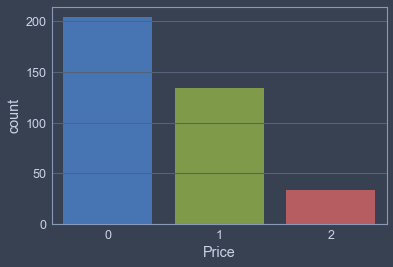

In [22]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

clss = df.copy()
clss['Price'] = mms.fit_transform(clss[['Price']])

bins = [-0.1, 0.15, 0.35, 1.0]
pr_rng = ['budget', 'business', 'lux']
clss['Price'] = pd.cut(clss['Price'], bins=bins, labels = pr_rng)

lb_enc = LabelEncoder()

clss['Price'] = lb_enc.fit_transform(clss['Price'])
sns.countplot(clss['Price'])

In [23]:
df['Price'] = df['Price'].astype(int)

## Data Modelling

In [24]:
ss = StandardScaler()

y = clss.Price
X = clss.drop('Price', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

cl = RandomForestClassifier(n_estimators = 300)
cl.fit(X_train, y_train)
pred = cl.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.77      0.91      0.83        22
           2       0.83      0.56      0.67         9

    accuracy                           0.89        75
   macro avg       0.86      0.81      0.82        75
weighted avg       0.90      0.89      0.89        75



### Clustering

In [26]:
from sklearn.cluster import KMeans

model = KMeans(init = 'random', n_clusters = 3, random_state=42)
model.fit(df[['Объем двигателя, л', 'Price']])
print(model.cluster_centers_)

[[1.51293561e-01 3.71950925e+06]
 [6.01759531e-01 2.75980645e+07]
 [2.70042709e-01 1.07571141e+07]]


<AxesSubplot:xlabel='Объем двигателя, л', ylabel='Price'>

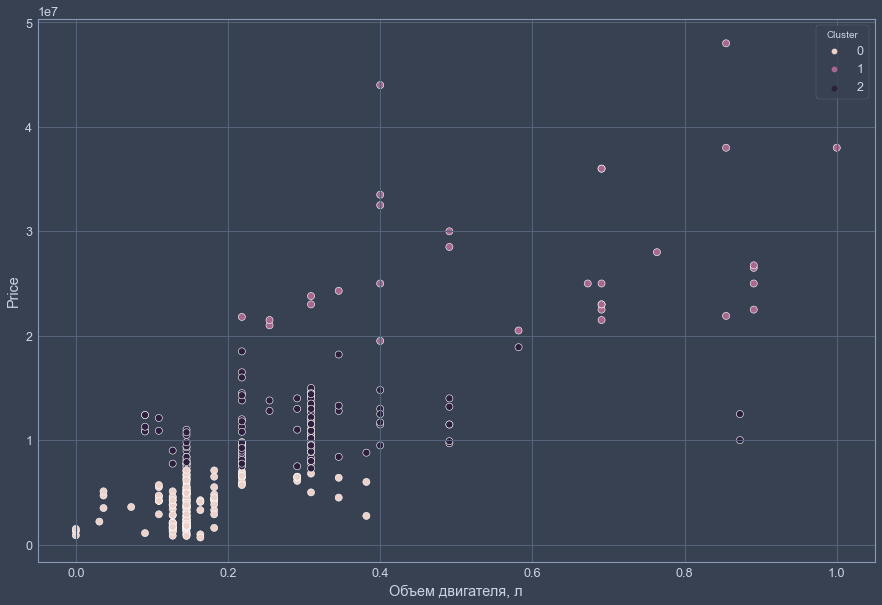

In [27]:
import matplotlib.pyplot as plt

df['Cluster'] = model.labels_

plt.figure(figsize=(15,10))
sns.scatterplot(y = 'Price', x = 'Объем двигателя, л', data=df, hue = 'Cluster', s=50)

### Regression

In [28]:
from sklearn.linear_model import LinearRegression

rg = LinearRegression()

x = df[['Объем двигателя, л']].values
y = df[['Price']].values

rg.fit(x, y)

y_pred = rg.predict(x)

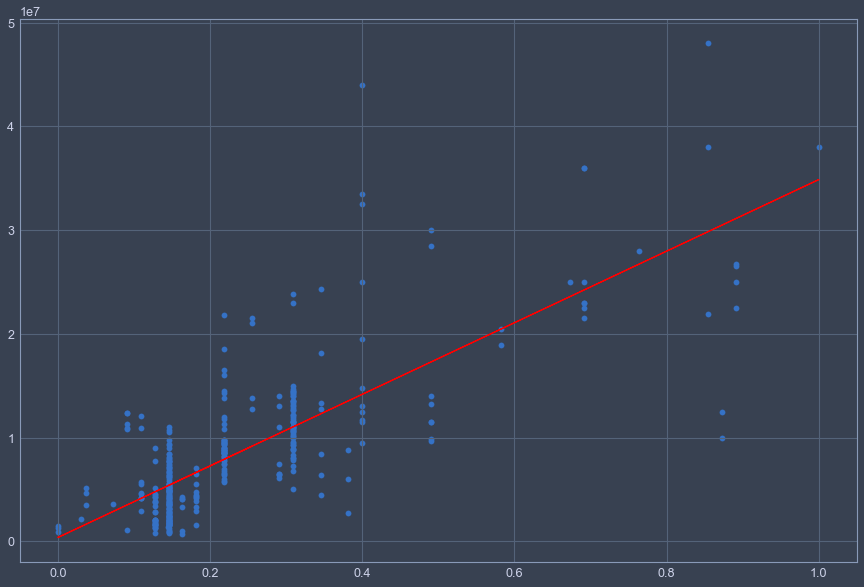

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(x, y)

plt.plot(x, y_pred, color='red')
plt.show()

In [30]:
print(rg.coef_)
print(rg.intercept_)

[[34492612.03576789]]
[374302.57825429]


## Without preprocessing

### Classification

In [31]:
raw = df_copy[['Year', 'Price', 'Объем двигателя, л', 'Пробег']]
clss = raw.copy()

clss['Price'] = clss['Price'].astype(int)
print(clss['Price'].max())

48000000


In [32]:
bins = [-0.1, 7000000, 17000000, 50000000]
pr_rng = ['budget', 'business', 'lux']
clss['Price'] = pd.cut(clss['Price'], bins=bins, labels = pr_rng)

lb_enc = LabelEncoder()

clss['Price'] = lb_enc.fit_transform(clss['Price'])

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

ss = StandardScaler()

y = clss.Price
X = clss.drop('Price', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

cl = RandomForestClassifier(n_estimators = 300)
cl.fit(X_train, y_train)
pred = cl.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.75      0.64      0.69        33
           2       0.27      1.00      0.43         3

    accuracy                           0.75        75
   macro avg       0.64      0.82      0.66        75
weighted avg       0.80      0.75      0.76        75



### Clustering

In [34]:
from sklearn.cluster import KMeans

model = KMeans(init = 'random', n_clusters = 3, random_state=42)
model.fit(raw[['Объем двигателя, л', 'Price']])
print(model.cluster_centers_)

[[1.63211458e+00 3.71950925e+06]
 [4.10967742e+00 2.75980645e+07]
 [2.28523490e+00 1.07571141e+07]]


<ipython-input-35-26f7a1806eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['Cluster'] = model.labels_


<AxesSubplot:xlabel='Объем двигателя, л', ylabel='Price'>

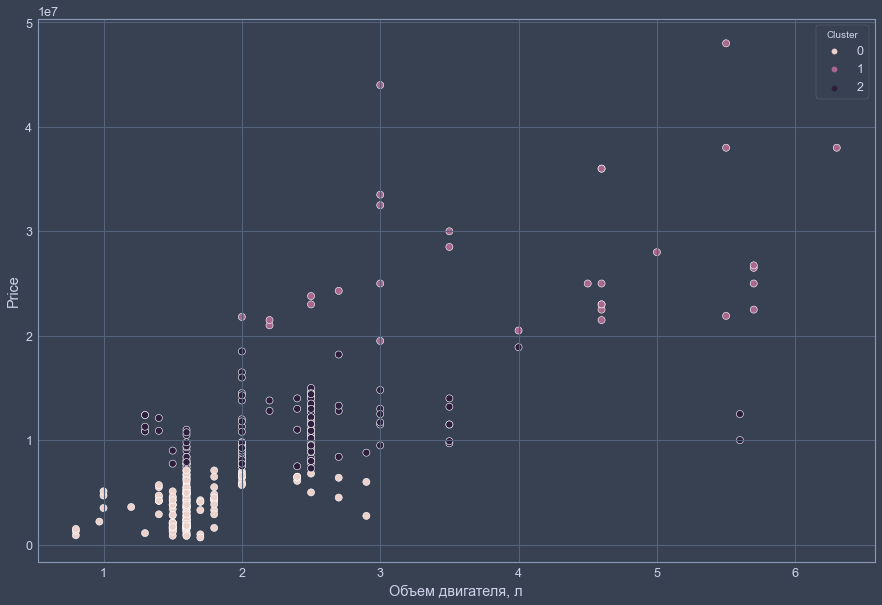

In [35]:
raw['Cluster'] = model.labels_

plt.figure(figsize=(15,10))
sns.scatterplot(y = 'Price', x = 'Объем двигателя, л', data=raw, hue = 'Cluster', s=50)

### Regression

[[6271384.00650325]]
[-4642804.6269483]


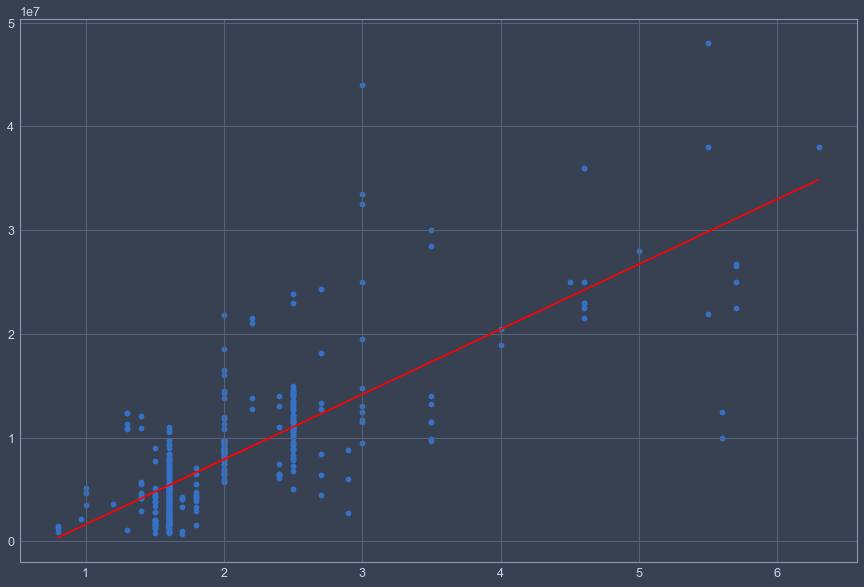

In [36]:
from sklearn.linear_model import LinearRegression

rg = LinearRegression()

x = raw[['Объем двигателя, л']].values
y = raw[['Price']].values

rg.fit(x, y)
y_pred = rg.predict(x)

print(rg.coef_)
print(rg.intercept_)

plt.figure(figsize=(15,10))
plt.scatter(x, y)

plt.plot(x, y_pred, color='red')
plt.show()

## Conclusion

So in with the raw data we get accuracy 80%, and with using feature selection and preprocessing  we have 90% of accuracy.

So, It is evident that with using feature selection and preprocessing we get the better result for sure.

In this notebook, I tried these techniques:

    * Cleaning and shaping dataset    
    * Handling missing values    
    * Feature scaling/exploration
    * Classification, Clustering, Regression
    * Comparisement of models
    
Thanks for attention!